In [1]:
!pip install scikit-learn
!pip install seaborn

import pandas as pd
import logging
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import numpy as np
import pandas as pd
import logging

#pd.set_option('display.max_rows', 500)


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
data = pd.read_csv("ESGData.csv")
df = data.copy()
df = df.iloc[3266:]
df = df.drop(columns=['Unnamed: 67'])

In [3]:
# Filter the data for specific 'Indicator Name' values
filtered_indicators = [
    'Life expectancy at birth, total (years)',  
    'Agricultural land (% of land area)',
    'Population density (people per sq. km of land area)'
]
df_filtered = df[df['Indicator Name'].isin(filtered_indicators)]

# Transpose the year columns and create a new DataFrame
df_formatted = pd.melt(df_filtered, 
                       id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], 
                       var_name='Year', 
                       value_name='Value')

# Display the first few rows of the formatted DataFrame
df_formatted.head()

Country Name Country Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   
2  Afghanistan          AFG   
3      Albania          ALB   
4      Albania          ALB   

                                      Indicator Name  Indicator Code  Year  \
0                 Agricultural land (% of land area)  AG.LND.AGRI.ZS  1960   
1            Life expectancy at birth, total (years)  SP.DYN.LE00.IN  1960   
2  Population density (people per sq. km of land ...     EN.POP.DNST  1960   
3                 Agricultural land (% of land area)  AG.LND.AGRI.ZS  1960   
4            Life expectancy at birth, total (years)  SP.DYN.LE00.IN  1960   

    Value  
0     NaN  
1  32.535  
2     NaN  
3     NaN  
4  54.439

In [4]:
# Splitting df_formatted into separate DataFrames for each Indicator Name
life_expectancy_df = df_formatted[df_formatted['Indicator Name'] == 'Life expectancy at birth, total (years)'][
    ['Country Name', 'Country Code', 'Year', 'Value']
].rename(columns={'Value': 'Life expectancy at birth, total (years)'})

gdp_growth_df = df_formatted[df_formatted['Indicator Name'] == 'Agricultural land (% of land area)'][
    ['Country Name', 'Country Code', 'Year', 'Value']
].rename(columns={'Value': 'Agricultural land (% of land area)'})

spei_df = df_formatted[df_formatted['Indicator Name'] == 'Population density (people per sq. km of land area)'][
    ['Country Name', 'Country Code', 'Year', 'Value']
].rename(columns={'Value': 'Population density (people per sq. km of land area)'})

# Merging the DataFrames on 'Country Name', 'Country Code', and 'Year' to combine them
merged_df = life_expectancy_df.merge(gdp_growth_df, on=['Country Name', 'Country Code', 'Year'], how='outer')\
                              .merge(spei_df, on=['Country Name', 'Country Code', 'Year'], how='outer')

# Display the first few rows of the final merged DataFrame
merged_df

Country Name Country Code  Year  \
0      Afghanistan          AFG  1960   
1      Afghanistan          AFG  1961   
2      Afghanistan          AFG  1962   
3      Afghanistan          AFG  1963   
4      Afghanistan          AFG  1964   
...            ...          ...   ...   
12154     Zimbabwe          ZWE  2018   
12155     Zimbabwe          ZWE  2019   
12156     Zimbabwe          ZWE  2020   
12157     Zimbabwe          ZWE  2021   
12158     Zimbabwe          ZWE  2022   

       Life expectancy at birth, total (years)  \
0                                       32.535   
1                                       33.068   
2                                       33.547   
3                                       34.016   
4                                       34.494   
...                                        ...   
12154                                   61.414   
12155                                   61.292   
12156                                   61.124   
12157                                      NaN   
12158                                      NaN   

       Agricultural land (% of land area)  \
0                                     NaN   
1                               57.878356   
2                               57.955016   
3                               58.031676   
4                               58.116002   
...                                   ...   
12154                           41.876696   
12155                           41.876696   
12156                           41.876696   
12157                           41.876696   
12158                                 NaN   

       Population density (people per sq. km of land area)  
0                                                    NaN    
1                                              13.477056    
2                                              13.751356    
3                                              14.040239    
4                                              14.343888    
...                                                  ...    
12154                                          38.909614    
12155                                          39.691374    
12156                                          40.505793    
12157                                          41.342960    
12158                                                NaN    

[12159 rows x 6 columns]

In [5]:
# Selecting specified columns
selected_df = merged_df[['Country Name', 'Country Code', 'Year', 'Life expectancy at birth, total (years)', 'Agricultural land (% of land area)','Population density (people per sq. km of land area)']].copy()

# Sorting by 'Country Name' and 'Year' to prepare for rolling calculations
selected_df = selected_df.sort_values(by=['Country Name', 'Year'])

# Creating Moving Average and STD columns for the specified time frames (2, 3, 5, and 10 years)
time_frames = [2, 3, 5, 10]
for window in time_frames:
    selected_df[f'LE Moving_Avg_{window}Y'] = selected_df.groupby('Country Name')['Life expectancy at birth, total (years)'].transform(lambda x: x.rolling(window, min_periods=1).mean())
selected_df['Year'] = selected_df['Year'].astype(int)
# Displaying the first few rows of the updated DataFrame
selected_df.loc[selected_df['Country Name'] == 'Austria']

Country Name Country Code  Year  Life expectancy at birth, total (years)  \
567      Austria          AUT  1960                                68.585610   
568      Austria          AUT  1961                                69.577317   
569      Austria          AUT  1962                                69.309512   
570      Austria          AUT  1963                                69.443659   
571      Austria          AUT  1964                                69.921951   
..           ...          ...   ...                                      ...   
625      Austria          AUT  2018                                81.692683   
626      Austria          AUT  2019                                81.895122   
627      Austria          AUT  2020                                81.192683   
628      Austria          AUT  2021                                      NaN   
629      Austria          AUT  2022                                      NaN   

     Agricultural land (% of land area)  \
567                                 NaN   
568                           43.085313   
569                           42.789627   
570                           42.290354   
571                           42.129181   
..                                  ...   
625                           32.147722   
626                           32.128090   
627                           31.539813   
628                           31.476726   
629                                 NaN   

     Population density (people per sq. km of land area)  LE Moving_Avg_2Y  \
567                                                NaN           68.585610   
568                                          85.873715           69.081463   
569                                          86.401648           69.443415   
570                                          86.958446           69.376585   
571                                          87.540002           69.682805   
..                                                 ...                 ...   
625                                         107.131859           81.668293   
626                                         107.609307           81.793902   
627                                         108.057004           81.543902   
628                                         108.528805           81.192683   
629                                                NaN                 NaN   

     LE Moving_Avg_3Y  LE Moving_Avg_5Y  LE Moving_Avg_10Y  
567         68.585610         68.585610          68.585610  
568         69.081463         69.081463          69.081463  
569         69.157480         69.157480          69.157480  
570         69.443496         69.229024          69.229024  
571         69.558374         69.367610          69.367610  
..                ...               ...                ...  
625         81.659350         81.531707          81.162683  
626         81.743902         81.612683          81.319024  
627         81.593496         81.613171          81.380244  
628         81.543902         81.606098          81.424390  
629         81.192683         81.593496          81.485366  

[63 rows x 10 columns]

## Training and testing the model for indicator 1

In [6]:
# Define year variables for training and prediction
TRAIN_START_YEAR = 1990
TRAIN_END_YEAR = 2009
PREDICTION_START_YEAR = 2010
PREDICTION_END_YEAR = 2019

# Setting up logging configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

# Splitting data into training (2000-2019) set and setting up prediction years
train_df = selected_df[(selected_df['Year'] >= TRAIN_START_YEAR) & (selected_df['Year'] <= TRAIN_END_YEAR)].dropna(subset=['Life expectancy at birth, total (years)'])
prediction_years = range(PREDICTION_START_YEAR, PREDICTION_END_YEAR + 1)

# Preparing training data for the model
X_train = train_df[['Year', 'LE Moving_Avg_2Y', 'LE Moving_Avg_3Y', 'LE Moving_Avg_5Y', 'LE Moving_Avg_10Y']].values
y_train = train_df['Life expectancy at birth, total (years)'].values

# Initializing and training the Random Forest model on all training data
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
logger.info(f"Model trained on all countries' data ({TRAIN_START_YEAR}-{TRAIN_END_YEAR}). Starting recursive forecasting.")

# Dictionary to store predictions for each country
country_recursive_predictions_rf = {}

# Recursive forecasting for each country separately with detailed logging
for country in train_df['Country Name'].unique():
    logger.info(f"Processing country: {country}")

    # Get the last available data point for the country to start recursive prediction
    country_data = train_df[train_df['Country Name'] == country].iloc[-1].copy()
    predictions_per_country = {country_data['Year']: country_data['Life expectancy at birth, total (years)']}

    # Recursive prediction loop from PREDICTION_START_YEAR to PREDICTION_END_YEAR
    for year in prediction_years:
        country_data['Year'] = year
        
        # Logging the input data used for this prediction
        logger.info(f"Prediction inputs for {country} in {year}: Year={year}, "
                    f"LE Moving_Avg_2Y={country_data['LE Moving_Avg_2Y']}, "
                    f"LE Moving_Avg_3Y={country_data['LE Moving_Avg_3Y']}, "
                    f"LE Moving_Avg_5Y={country_data['LE Moving_Avg_5Y']}, "
                    f"LE Moving_Avg_10Y={country_data['LE Moving_Avg_10Y']}")
        
        # Preparing the features for the current prediction
        X_test = country_data[['Year', 'LE Moving_Avg_2Y', 'LE Moving_Avg_3Y', 'LE Moving_Avg_5Y', 'LE Moving_Avg_10Y']].values.reshape(1, -1)
        
        # Predicting life expectancy for the current year
        predicted_value = model_rf.predict(X_test)[0]
        logger.info(f"Predicted value for {country} in {year}: {predicted_value}")
        
        # Update the prediction in the dictionary
        predictions_per_country[year] = predicted_value
        
        # Update the features for the next prediction year based on the new prediction
        country_data['Life expectancy at birth, total (years)'] = predicted_value
        country_data['LE Moving_Avg_2Y'] = (predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 2
        country_data['LE Moving_Avg_3Y'] = (predictions_per_country.get(year - 2, predicted_value) +
                                         predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 3
        country_data['LE Moving_Avg_5Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 4, year + 1)) / 5)
        country_data['LE Moving_Avg_10Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 9, year + 1)) / 10)

    # Store the predictions for the country
    country_recursive_predictions_rf[country] = predictions_per_country


2024-11-12 16:37:39,066 - INFO - Model trained on all countries' data (1990-2009). Starting recursive forecasting.
2024-11-12 16:37:39,067 - INFO - Processing country: Afghanistan
2024-11-12 16:37:39,068 - INFO - Prediction inputs for Afghanistan in 2010: Year=2010, LE Moving_Avg_2Y=60.108, LE Moving_Avg_3Y=59.775666666666666, LE Moving_Avg_5Y=59.27439999999999, LE Moving_Avg_10Y=57.92100000000001
2024-11-12 16:37:39,070 - INFO - Predicted value for Afghanistan in 2010: 60.40797999999991
2024-11-12 16:37:39,071 - INFO - Prediction inputs for Afghanistan in 2011: Year=2011, LE Moving_Avg_2Y=60.38598999999995, LE Moving_Avg_3Y=60.39331999999994, LE Moving_Avg_5Y=60.399183999999934, LE Moving_Avg_10Y=60.403581999999915
2024-11-12 16:37:39,073 - INFO - Predicted value for Afghanistan in 2011: 60.625
2024-11-12 16:37:39,073 - INFO - Prediction inputs for Afghanistan in 2012: Year=2012, LE Moving_Avg_2Y=60.516489999999955, LE Moving_Avg_3Y=60.465659999999964, LE Moving_Avg_5Y=60.529395999999

In [7]:
# Initialize lists to collect all actual and predicted values across countries
all_actual_values = []
all_predicted_values = []

for country, predictions in country_recursive_predictions_rf.items():
    predicted_years = list(predictions.keys())
    predicted_values = list(predictions.values())

    # Extract actual values from selected_df for the specified prediction years
    actual_data = selected_df[(selected_df['Country Name'] == country) & (selected_df['Year'].isin(predicted_years))]
    actual_values = actual_data['Life expectancy at birth, total (years)'].values

    # Ensure no NaN or inf values in actual and predicted values
    if len(actual_values) == len(predicted_values):
        actual_values_clean = np.array(actual_values)
        predicted_values_clean = np.array(predicted_values)
        
        # Filter out any NaN or inf values
        valid_indices = ~np.isnan(actual_values_clean) & ~np.isinf(actual_values_clean) & \
                        ~np.isnan(predicted_values_clean) & ~np.isinf(predicted_values_clean)
        actual_values_clean = actual_values_clean[valid_indices]
        predicted_values_clean = predicted_values_clean[valid_indices]

        # Append clean values to the overall lists
        all_actual_values.extend(actual_values_clean)
        all_predicted_values.extend(predicted_values_clean)

# Calculate overall metrics across all countries
if len(all_actual_values) > 0:
    overall_mae = mean_absolute_error(all_actual_values, all_predicted_values)
    overall_mse = mean_squared_error(all_actual_values, all_predicted_values)
    overall_rmse = np.sqrt(overall_mse)
    overall_r2 = r2_score(all_actual_values, all_predicted_values)

else:
    logger.warning("No valid values available for metric calculation.")

# Displaying the overall metrics
print(f"Overall Mean Absolute Error (MAE): {overall_mae:.2f}")
print(f"Overall Mean Squared Error (MSE): {overall_mse:.2f}")
print(f"Overall Root Mean Squared Error (RMSE): {overall_rmse:.2f}")
print(f"Overall R-squared (R²): {overall_r2:.2f}")

Overall Mean Absolute Error (MAE): 1.49
Overall Mean Squared Error (MSE): 5.29
Overall Root Mean Squared Error (RMSE): 2.30
Overall R-squared (R²): 0.92


In [8]:


# Initialize lists to collect all actual, predicted values, and years across countries
all_actual_values = []
all_predicted_values = []
all_years = []

for country, predictions in country_recursive_predictions_rf.items():
    # Get predictions and corresponding years
    predicted_years = [year for year in predictions.keys() if year >= 2010]
    predicted_values = [predictions[year] for year in predicted_years]

    # Extract actual values from selected_df for the specified prediction years
    actual_data = selected_df[(selected_df['Country Name'] == country) & (selected_df['Year'].isin(predicted_years))]
    actual_values = actual_data['Life expectancy at birth, total (years)'].values
    years = actual_data['Year'].values

    # Ensure no NaN or inf values in actual and predicted values
    if len(actual_values) == len(predicted_values):
        actual_values_clean = np.array(actual_values)
        predicted_values_clean = np.array(predicted_values)
        
        # Filter out any NaN or inf values
        valid_indices = ~np.isnan(actual_values_clean) & ~np.isinf(actual_values_clean) & \
                        ~np.isnan(predicted_values_clean) & ~np.isinf(predicted_values_clean)
        
        actual_values_clean = actual_values_clean[valid_indices]
        predicted_values_clean = predicted_values_clean[valid_indices]
        years_clean = years[valid_indices]

        # Append clean values from 2010 onward to the overall lists
        all_actual_values.extend(actual_values_clean)
        all_predicted_values.extend(predicted_values_clean)
        all_years.extend(years_clean)


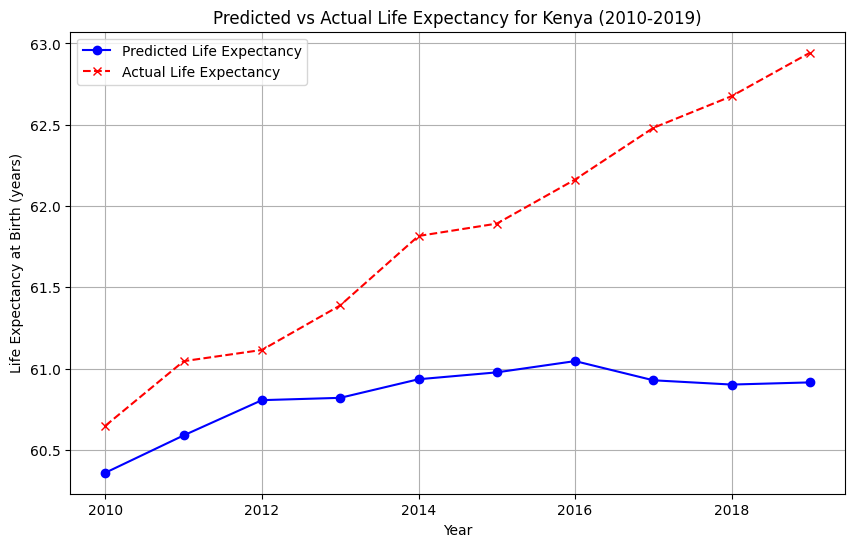

In [9]:
# Function to plot predictions vs actual values for a specified country
def plot_country_predictions_vs_actual(country_name):
    # Extracting predictions for the specified country
    if country_name not in country_recursive_predictions_rf:
        logger.error(f"No predictions found for {country_name}.")
        return

    predictions = country_recursive_predictions_rf[country_name]
    predicted_years = [year for year in predictions.keys() if year >= 2010]
    predicted_values = [predictions[year] for year in predicted_years]

    # Extracting actual values for the specified country and prediction years (2010 onward)
    actual_data = test_df[(test_df['Country Name'] == country_name) & (test_df['Year'].isin(predicted_years))]
    actual_years = actual_data['Year'].values
    actual_values = actual_data['Life expectancy at birth, total (years)'].values

    # Plotting predictions vs actual values from 2010 onward
    plt.figure(figsize=(10, 6))
    plt.plot(predicted_years, predicted_values, label='Predicted Life Expectancy', color='blue', marker='o')
    plt.plot(actual_years, actual_values, label='Actual Life Expectancy', color='red', linestyle='--', marker='x')
    plt.xlabel("Year")
    plt.ylabel("Life Expectancy at Birth (years)")
    plt.title(f"Predicted vs Actual Life Expectancy for {country_name} (2010-2019)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Redefining test_df based on the years 2010-2019 from selected_df
test_df = selected_df[(selected_df['Year'] >= 2010) & (selected_df['Year'] <= 2019)].dropna(subset=['Life expectancy at birth, total (years)'])

# Rerun the plotting function for Kenya as an example
plot_country_predictions_vs_actual("Kenya")

## Forecasting

In [10]:
# Define year variables for training and prediction
TRAIN_START_YEAR = 2000
TRAIN_END_YEAR = 2019
PREDICTION_START_YEAR = 2019
PREDICTION_END_YEAR = 2030

# Setting up logging configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

# Splitting data into training (2000-2019) set and setting up prediction years
train_df = selected_df[(selected_df['Year'] >= TRAIN_START_YEAR) & (selected_df['Year'] <= TRAIN_END_YEAR)].dropna(subset=['Life expectancy at birth, total (years)'])
prediction_years = range(PREDICTION_START_YEAR, PREDICTION_END_YEAR + 1)

# Preparing training data for the model
X_train = train_df[['Year', 'LE Moving_Avg_2Y', 'LE Moving_Avg_3Y', 'LE Moving_Avg_5Y', 'LE Moving_Avg_10Y']].values
y_train = train_df['Life expectancy at birth, total (years)'].values

# Initializing and training the Random Forest model on all training data
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
logger.info(f"Model trained on all countries' data ({TRAIN_START_YEAR}-{TRAIN_END_YEAR}). Starting recursive forecasting.")

# Dictionary to store predictions for each country
country_recursive_predictions_rf = {}

# Recursive forecasting for each country separately with detailed logging
for country in train_df['Country Name'].unique():
    logger.info(f"Processing country: {country}")

    # Get the last available data point for the country to start recursive prediction
    country_data = train_df[train_df['Country Name'] == country].iloc[-1].copy()
    predictions_per_country = {country_data['Year']: country_data['Life expectancy at birth, total (years)']}

    # Recursive prediction loop from PREDICTION_START_YEAR to PREDICTION_END_YEAR
    for year in prediction_years:
        country_data['Year'] = year
        
        # Logging the input data used for this prediction
        logger.info(f"Prediction inputs for {country} in {year}: Year={year}, "
                    f"LE Moving_Avg_2Y={country_data['LE Moving_Avg_2Y']}, "
                    f"LE Moving_Avg_3Y={country_data['LE Moving_Avg_3Y']}, "
                    f"LE Moving_Avg_5Y={country_data['LE Moving_Avg_5Y']}, "
                    f"LE Moving_Avg_10Y={country_data['LE Moving_Avg_10Y']}")
        
        # Preparing the features for the current prediction
        X_test = country_data[['Year', 'LE Moving_Avg_2Y', 'LE Moving_Avg_3Y', 'LE Moving_Avg_5Y', 'LE Moving_Avg_10Y']].values.reshape(1, -1)
        
        # Predicting life expectancy for the current year
        predicted_value = model_rf.predict(X_test)[0]
        logger.info(f"Predicted value for {country} in {year}: {predicted_value}")
        
        # Update the prediction in the dictionary
        predictions_per_country[year] = predicted_value
        
        # Update the features for the next prediction year based on the new prediction
        country_data['Life expectancy at birth, total (years)'] = predicted_value
        country_data['LE Moving_Avg_2Y'] = (predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 2
        country_data['Moving_Avg_3Y'] = (predictions_per_country.get(year - 2, predicted_value) +
                                         predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 3
        country_data['LE Moving_Avg_5Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 4, year + 1)) / 5)
        country_data['LE Moving_Avg_10Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 9, year + 1)) / 10)

    # Store the predictions for the country
    country_recursive_predictions_rf[country] = predictions_per_country


2024-11-12 16:37:45,312 - INFO - Model trained on all countries' data (2000-2019). Starting recursive forecasting.
2024-11-12 16:37:45,313 - INFO - Processing country: Afghanistan
2024-11-12 16:37:45,314 - INFO - Prediction inputs for Afghanistan in 2019: Year=2019, LE Moving_Avg_2Y=63.323, LE Moving_Avg_3Y=63.220666666666666, LE Moving_Avg_5Y=63.0914, LE Moving_Avg_10Y=62.4612
2024-11-12 16:37:45,320 - INFO - Predicted value for Afghanistan in 2019: 63.51712999999991
2024-11-12 16:37:45,326 - INFO - Prediction inputs for Afghanistan in 2020: Year=2020, LE Moving_Avg_2Y=63.51712999999991, LE Moving_Avg_3Y=63.220666666666666, LE Moving_Avg_5Y=63.51712999999991, LE Moving_Avg_10Y=63.51712999999991
2024-11-12 16:37:45,346 - INFO - Predicted value for Afghanistan in 2020: 63.32777
2024-11-12 16:37:45,347 - INFO - Prediction inputs for Afghanistan in 2021: Year=2021, LE Moving_Avg_2Y=63.422449999999955, LE Moving_Avg_3Y=63.220666666666666, LE Moving_Avg_5Y=63.36564199999998, LE Moving_Avg_1

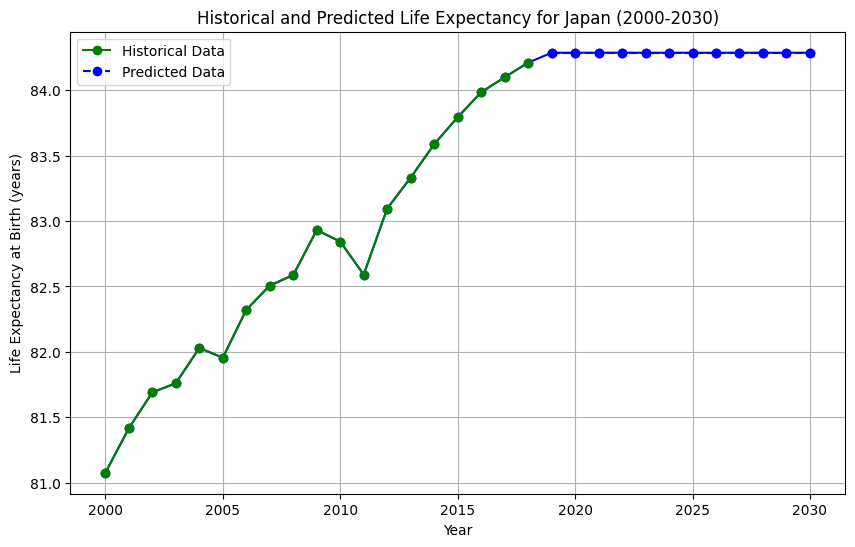

In [11]:
# Function to plot historical and predicted life expectancy for a specified country
def plot_country_predictions_vs_actual(country_name):
    # Extracting predictions for the specified country
    if country_name not in country_recursive_predictions_rf:
        logger.error(f"No predictions found for {country_name}.")
        return

    predictions = country_recursive_predictions_rf[country_name]
    predicted_years = list(predictions.keys())
    predicted_values = list(predictions.values())

    # Extracting historical values for the specified country (2000-2019)
    historical_data = selected_df[(selected_df['Country Name'] == country_name) & 
                                  (selected_df['Year'] >= TRAIN_START_YEAR) & 
                                  (selected_df['Year'] <= TRAIN_END_YEAR-1)]
    historical_years = historical_data['Year'].values
    historical_values = historical_data['Life expectancy at birth, total (years)'].values

    # Combining historical and predicted data to ensure a continuous line
    combined_years = list(historical_years) + predicted_years
    combined_values = list(historical_values) + predicted_values

    # Plotting historical and predicted values as a single line
    plt.figure(figsize=(10, 6))
    plt.plot(combined_years, combined_values, color='blue', marker='o', linestyle='-')
    plt.plot(historical_years, historical_values, label='Historical Data', color='green', marker='o')
    plt.plot(predicted_years, predicted_values, label='Predicted Data', color='blue', marker='o', linestyle='--')
    plt.xlabel("Year")
    plt.ylabel("Life Expectancy at Birth (years)")
    plt.title(f"Historical and Predicted Life Expectancy for {country_name} (2000-2030)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Rerun the plotting function for Canada as an example
plot_country_predictions_vs_actual("Japan")

In [12]:
# Displaying feature importances from the Random Forest model directly

# Calculating feature importances
feature_importances = model_rf.feature_importances_
feature_names = ['Year', 'LE Moving_Avg_2Y', 'LE Moving_Avg_3Y', 'LE Moving_Avg_5Y', 'LE Moving_Avg_10Y']

# Creating a DataFrame to organize and sort feature importances
import pandas as pd
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
importance_df.reset_index(drop=True, inplace=True)
importance_df

Feature  Importance
0   LE Moving_Avg_2Y    0.983208
1   LE Moving_Avg_3Y    0.016070
2   LE Moving_Avg_5Y    0.000441
3  LE Moving_Avg_10Y    0.000219
4               Year    0.000062

In [62]:
# Converting the dictionary of predictions for each country (country_recursive_predictions_rf) into a DataFrame

# Initialize an empty list to store rows for the DataFrame
rows = []

# Loop through each country and its predictions to build the DataFrame rows
for country, predictions in country_recursive_predictions_rf.items():
    for year, life_expectancy in predictions.items():
        # Append each prediction as a new row with the country, year, and predicted value
        rows.append({'Country Name': country, 'Year': year, 'Life expectancy at birth, total (years)': life_expectancy})

# Convert the list of rows into a DataFrame
predictions_df_1= pd.DataFrame(rows)

# Display the first few rows of the DataFrame
predictions_df_1

Country Name  Year  Life expectancy at birth, total (years)
0     Afghanistan  2019                                57.915833
1     Afghanistan  2020                                58.456919
2     Afghanistan  2021                                58.964175
3     Afghanistan  2022                                59.329357
4     Afghanistan  2023                                59.762140
...           ...   ...                                      ...
2311     Zimbabwe  2026                                40.774554
2312     Zimbabwe  2027                                40.798040
2313     Zimbabwe  2028                                41.135138
2314     Zimbabwe  2029                                41.265114
2315     Zimbabwe  2030                                41.364317

[2316 rows x 3 columns]

In [14]:
## Indicator 2

In [15]:
# Selecting specified columns
selected_df_2 = merged_df[['Country Name', 'Country Code', 'Year', 'Agricultural land (% of land area)']].copy()

# Sorting by 'Country Name' and 'Year' to prepare for rolling calculations
selected_df_2 = selected_df_2.sort_values(by=['Country Name', 'Year'])

# Creating Moving Average and STD columns for the specified time frames (2, 3, 5, and 10 years)
time_frames = [2, 3, 5, 10]
for window in time_frames:
    selected_df_2[f'AL Moving_Avg_{window}Y'] = selected_df_2.groupby('Country Name')['Agricultural land (% of land area)'].transform(lambda x: x.rolling(window, min_periods=1).mean())
    
# Displaying the first few rows of the updated DataFrame
selected_df_2.loc[selected_df_2['Country Name'] == 'Canada']
selected_df_2['Year'] = selected_df_2['Year'].astype(int)

# Define year variables for training and prediction
TRAIN_START_YEAR = 1990
TRAIN_END_YEAR = 2009
PREDICTION_START_YEAR = 2010
PREDICTION_END_YEAR = 2019

# Setting up logging configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

# Splitting data into training (2000-2019) set and setting up prediction years
train_df_2 = selected_df_2[(selected_df_2['Year'] >= TRAIN_START_YEAR) & (selected_df_2['Year'] <= TRAIN_END_YEAR)].dropna(subset=['Agricultural land (% of land area)'])
prediction_years = range(PREDICTION_START_YEAR, PREDICTION_END_YEAR + 1)

# Preparing training data for the model
X_train = train_df_2[['Year', 'AL Moving_Avg_2Y', 'AL Moving_Avg_3Y', 'AL Moving_Avg_5Y', 'AL Moving_Avg_10Y']].values
y_train = train_df_2['Agricultural land (% of land area)'].values

# Initializing and training the Random Forest model on all training data
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
logger.info(f"Model trained on all countries' data ({TRAIN_START_YEAR}-{TRAIN_END_YEAR}). Starting recursive forecasting.")

# Dictionary to store predictions for each country
country_recursive_predictions_rf = {}

# Recursive forecasting for each country separately with detailed logging
for country in train_df_2['Country Name'].unique():
    logger.info(f"Processing country: {country}")

    # Get the last available data point for the country to start recursive prediction
    country_data = train_df_2[train_df_2['Country Name'] == country].iloc[-1].copy()
    predictions_per_country = {country_data['Year']: country_data['Agricultural land (% of land area)']}

    # Recursive prediction loop from PREDICTION_START_YEAR to PREDICTION_END_YEAR
    for year in prediction_years:
        country_data['Year'] = year
        
        # Logging the input data used for this prediction
        logger.info(f"Prediction inputs for {country} in {year}: Year={year}, "
                    f"AL Moving_Avg_2Y={country_data['AL Moving_Avg_2Y']}, "
                    f"AL Moving_Avg_3Y={country_data['AL Moving_Avg_3Y']}, "
                    f"AL Moving_Avg_5Y={country_data['AL Moving_Avg_5Y']}, "
                    f"AL Moving_Avg_10Y={country_data['AL Moving_Avg_10Y']}")
        
        # Preparing the features for the current prediction
        X_test = country_data[['Year', 'AL Moving_Avg_2Y', 'AL Moving_Avg_3Y', 'AL Moving_Avg_5Y', 'AL Moving_Avg_10Y']].values.reshape(1, -1)
        
        # Predicting agricultural land use for the current year
        predicted_value = model_rf.predict(X_test)[0]
        logger.info(f"Predicted value for {country} in {year}: {predicted_value}")
        
        # Update the prediction in the dictionary
        predictions_per_country[year] = predicted_value
        
        # Update the features for the next prediction year based on the new prediction
        country_data['Agricultural land (% of land area)'] = predicted_value
        country_data['AL Moving_Avg_2Y'] = (predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 2
        country_data['AL Moving_Avg_3Y'] = (predictions_per_country.get(year - 2, predicted_value) +
                                         predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 3
        country_data['AL Moving_Avg_5Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 4, year + 1)) / 5)
        country_data['AL Moving_Avg_10Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 9, year + 1)) / 10)

    # Store the predictions for the country
    country_recursive_predictions_rf[country] = predictions_per_country


2024-11-12 16:37:52,251 - INFO - Model trained on all countries' data (1990-2009). Starting recursive forecasting.
2024-11-12 16:37:52,253 - INFO - Processing country: Afghanistan
2024-11-12 16:37:52,255 - INFO - Prediction inputs for Afghanistan in 2010: Year=2010, AL Moving_Avg_2Y=58.132867240084, AL Moving_Avg_3Y=58.131845105765336, AL Moving_Avg_5Y=58.130720758014796, AL Moving_Avg_10Y=58.07215246155497
2024-11-12 16:37:52,257 - INFO - Predicted value for Afghanistan in 2010: 58.132778863462484
2024-11-12 16:37:52,258 - INFO - Prediction inputs for Afghanistan in 2011: Year=2011, AL Moving_Avg_2Y=58.132823051773244, AL Moving_Avg_3Y=58.132808322336324, AL Moving_Avg_5Y=58.13279653878679, AL Moving_Avg_10Y=58.13278770112463
2024-11-12 16:37:52,260 - INFO - Predicted value for Afghanistan in 2011: 58.128393907235385
2024-11-12 16:37:52,260 - INFO - Prediction inputs for Afghanistan in 2012: Year=2012, AL Moving_Avg_2Y=58.130586385348934, AL Moving_Avg_3Y=58.131346670260626, AL Moving

In [16]:
for country, predictions in country_recursive_predictions_rf.items():
    predicted_years = list(predictions.keys())
    predicted_values = list(predictions.values())

    # Extract actual values from selected_df for the specified prediction years
    actual_data = selected_df_2[(selected_df_2['Country Name'] == country) & (selected_df_2['Year'].isin(predicted_years))]
    actual_values = actual_data['Agricultural land (% of land area)'].values

    # Ensure no NaN or inf values in actual and predicted values
    if len(actual_values) == len(predicted_values):
        actual_values_clean = np.array(actual_values)
        predicted_values_clean = np.array(predicted_values)
        
        # Filter out any NaN or inf values
        valid_indices = ~np.isnan(actual_values_clean) & ~np.isinf(actual_values_clean) & \
                        ~np.isnan(predicted_values_clean) & ~np.isinf(predicted_values_clean)
        actual_values_clean = actual_values_clean[valid_indices]
        predicted_values_clean = predicted_values_clean[valid_indices]

        # Append clean values to the overall lists
        all_actual_values.extend(actual_values_clean)
        all_predicted_values.extend(predicted_values_clean)

# Calculate overall metrics across all countries
if len(all_actual_values) > 0:
    overall_mae = mean_absolute_error(all_actual_values, all_predicted_values)
    overall_mse = mean_squared_error(all_actual_values, all_predicted_values)
    overall_rmse = np.sqrt(overall_mse)
    overall_r2 = r2_score(all_actual_values, all_predicted_values)

else:
    logger.warning("No valid values available for metric calculation.")

# Displaying the overall metrics
print(f"Overall Mean Absolute Error (MAE): {overall_mae:.2f}")
print(f"Overall Mean Squared Error (MSE): {overall_mse:.2f}")
print(f"Overall Root Mean Squared Error (RMSE): {overall_rmse:.2f}")
print(f"Overall R-squared (R²): {overall_r2:.2f}")

Overall Mean Absolute Error (MAE): 1.46
Overall Mean Squared Error (MSE): 6.69
Overall Root Mean Squared Error (RMSE): 2.59
Overall R-squared (R²): 0.99


In [17]:
# Initialize lists to collect all actual, predicted values, and years across countries
all_actual_values = []
all_predicted_values = []
all_years = []

for country, predictions in country_recursive_predictions_rf.items():
    # Get predictions and corresponding years
    predicted_years = [year for year in predictions.keys() if year >= 2010]
    predicted_values = [predictions[year] for year in predicted_years]

    # Extract actual values from selected_df for the specified prediction years
    actual_data = selected_df_2[(selected_df_2['Country Name'] == country) & (selected_df_2['Year'].isin(predicted_years))]
    actual_values = actual_data['Agricultural land (% of land area)'].values
    years = actual_data['Year'].values

    # Ensure no NaN or inf values in actual and predicted values
    if len(actual_values) == len(predicted_values):
        actual_values_clean = np.array(actual_values)
        predicted_values_clean = np.array(predicted_values)
        
        # Filter out any NaN or inf values
        valid_indices = ~np.isnan(actual_values_clean) & ~np.isinf(actual_values_clean) & \
                        ~np.isnan(predicted_values_clean) & ~np.isinf(predicted_values_clean)
        
        actual_values_clean = actual_values_clean[valid_indices]
        predicted_values_clean = predicted_values_clean[valid_indices]
        years_clean = years[valid_indices]

        # Append clean values from 2010 onward to the overall lists
        all_actual_values.extend(actual_values_clean)
        all_predicted_values.extend(predicted_values_clean)
        all_years.extend(years_clean)

# Create a DataFrame for easier plotting with hue
plot_data = pd.DataFrame({
    'Actual': all_actual_values,
    'Predicted': all_predicted_values,
    'Residuals': np.array(all_actual_values) - np.array(all_predicted_values),
    'Year': all_years
})

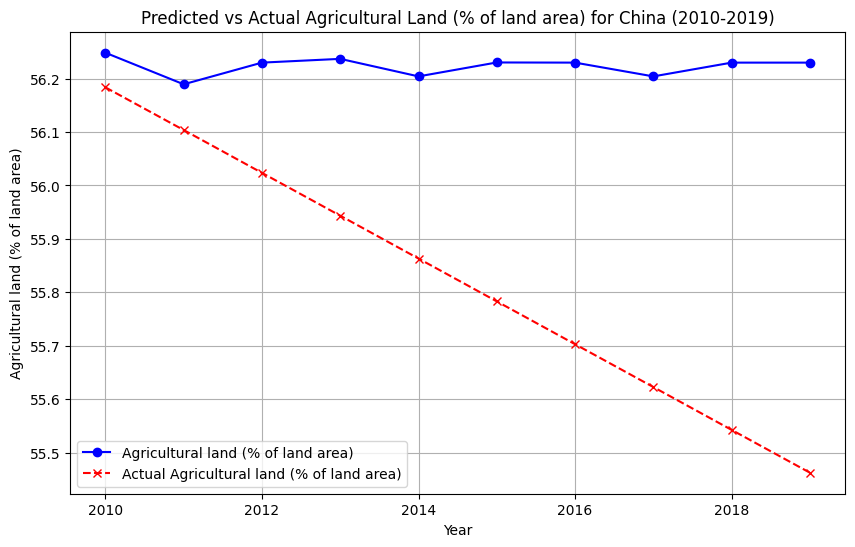

In [18]:
# Function to plot predictions vs actual values for a specified country
def plot_country_predictions_vs_actual(country_name):
    # Extracting predictions for the specified country
    if country_name not in country_recursive_predictions_rf:
        logger.error(f"No predictions found for {country_name}.")
        return

    predictions = country_recursive_predictions_rf[country_name]
    predicted_years = [year for year in predictions.keys() if year >= 2010]
    predicted_values = [predictions[year] for year in predicted_years]

    # Extracting actual values for the specified country and prediction years (2010 onward)
    actual_data = test_df[(test_df['Country Name'] == country_name) & (test_df['Year'].isin(predicted_years))]
    actual_years = actual_data['Year'].values
    actual_values = actual_data['Agricultural land (% of land area)'].values

    # Plotting predictions vs actual values from 2010 onward
    plt.figure(figsize=(10, 6))
    plt.plot(predicted_years, predicted_values, label='Agricultural land (% of land area)', color='blue', marker='o')
    plt.plot(actual_years, actual_values, label='Actual Agricultural land (% of land area)', color='red', linestyle='--', marker='x')
    plt.xlabel("Year")
    plt.ylabel("Agricultural land (% of land area)")
    plt.title(f"Predicted vs Actual Agricultural Land (% of land area) for {country_name} (2010-2019)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Redefining test_df based on the years 2010-2019 from selected_df
test_df = selected_df_2[(selected_df_2['Year'] >= 2010) & (selected_df_2['Year'] <= 2019)].dropna(subset=['Agricultural land (% of land area)'])

# Rerun the plotting function for Kenya as an example
plot_country_predictions_vs_actual("China")

In [19]:

# Define year variables for training and prediction
TRAIN_START_YEAR = 2000
TRAIN_END_YEAR = 2019
PREDICTION_START_YEAR = 2019
PREDICTION_END_YEAR = 2030

# Setting up logging configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

# Splitting data into training (2000-2019) set and setting up prediction years
train_df = selected_df_2[(selected_df_2['Year'] >= TRAIN_START_YEAR) & (selected_df_2['Year'] <= TRAIN_END_YEAR)].dropna(subset=['Agricultural land (% of land area)'])
prediction_years = range(PREDICTION_START_YEAR, PREDICTION_END_YEAR + 1)

# Preparing training data for the model
X_train = train_df[['Year', 'AL Moving_Avg_2Y', 'AL Moving_Avg_3Y', 'AL Moving_Avg_5Y', 'AL Moving_Avg_10Y']].values
y_train = train_df['Agricultural land (% of land area)'].values

# Initializing and training the Random Forest model on all training data
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
logger.info(f"Model trained on all countries' data ({TRAIN_START_YEAR}-{TRAIN_END_YEAR}). Starting recursive forecasting.")

# Dictionary to store predictions for each country
country_recursive_predictions_rf = {}

# Recursive forecasting for each country separately with detailed logging
for country in train_df['Country Name'].unique():
    logger.info(f"Processing country: {country}")

    # Get the last available data point for the country to start recursive prediction
    country_data = train_df[train_df['Country Name'] == country].iloc[-1].copy()
    predictions_per_country = {country_data['Year']: country_data['Agricultural land (% of land area)']}

    # Recursive prediction loop from PREDICTION_START_YEAR to PREDICTION_END_YEAR
    for year in prediction_years:
        country_data['Year'] = year
        
        # Logging the input data used for this prediction
        logger.info(f"Prediction inputs for {country} in {year}: Year={year}, "
                    f"AL Moving_Avg_2Y={country_data['AL Moving_Avg_2Y']}, "
                    f"AL Moving_Avg_3Y={country_data['AL Moving_Avg_3Y']}, "
                    f"AL Moving_Avg_5Y={country_data['AL Moving_Avg_5Y']}, "
                    f"AL Moving_Avg_10Y={country_data['AL Moving_Avg_10Y']}")
        
        # Preparing the features for the current prediction
        X_test = country_data[['Year', 'AL Moving_Avg_2Y', 'AL Moving_Avg_3Y', 'AL Moving_Avg_5Y', 'AL Moving_Avg_10Y']].values.reshape(1, -1)
        
        # Predicting agricultural land use for the current year
        predicted_value = model_rf.predict(X_test)[0]
        logger.info(f"Predicted value for {country} in {year}: {predicted_value}")
        
        # Update the prediction in the dictionary
        predictions_per_country[year] = predicted_value
        
        # Update the features for the next prediction year based on the new prediction
        country_data['Agricultural land (% of land area)'] = predicted_value
        country_data['AL Moving_Avg_2Y'] = (predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 2
        country_data['AL Moving_Avg_3Y'] = (predictions_per_country.get(year - 2, predicted_value) +
                                         predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 3
        country_data['AL Moving_Avg_5Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 4, year + 1)) / 5)
        country_data['AL Moving_Avg_10Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 9, year + 1)) / 10)

    # Store the predictions for the country
    country_recursive_predictions_rf[country] = predictions_per_country

2024-11-12 16:37:58,346 - INFO - Model trained on all countries' data (2000-2019). Starting recursive forecasting.
2024-11-12 16:37:58,347 - INFO - Processing country: Afghanistan
2024-11-12 16:37:58,348 - INFO - Prediction inputs for Afghanistan in 2019: Year=2019, AL Moving_Avg_2Y=58.2769881790166, AL Moving_Avg_3Y=58.22588146308306, AL Moving_Avg_5Y=58.184996090336234, AL Moving_Avg_10Y=58.156785183140926
2024-11-12 16:37:58,350 - INFO - Predicted value for Afghanistan in 2019: 58.312729703808735
2024-11-12 16:37:58,350 - INFO - Prediction inputs for Afghanistan in 2020: Year=2020, AL Moving_Avg_2Y=58.312729703808735, AL Moving_Avg_3Y=58.312729703808735, AL Moving_Avg_5Y=58.312729703808735, AL Moving_Avg_10Y=58.31272970380873
2024-11-12 16:37:58,352 - INFO - Predicted value for Afghanistan in 2020: 58.38285559270273
2024-11-12 16:37:58,352 - INFO - Prediction inputs for Afghanistan in 2021: Year=2021, AL Moving_Avg_2Y=58.347792648255734, AL Moving_Avg_3Y=58.35948029640473, AL Moving

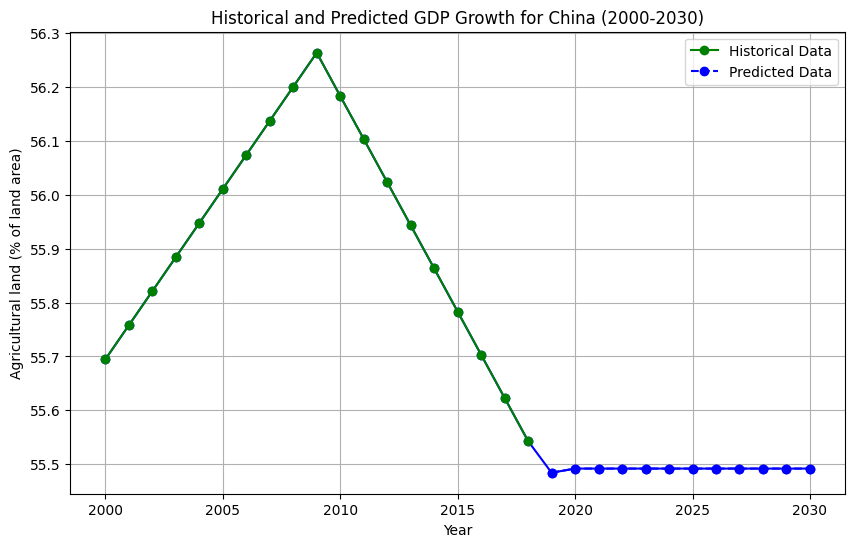

In [20]:
# Function to plot historical and predicted agricultural land use for a specified country
def plot_country_predictions_vs_actual(country_name):
    # Extracting predictions for the specified country
    if country_name not in country_recursive_predictions_rf:
        logger.error(f"No predictions found for {country_name}.")
        return

    predictions = country_recursive_predictions_rf[country_name]
    predicted_years = list(predictions.keys())
    predicted_values = list(predictions.values())

    # Extracting historical values for the specified country (2000-2019)
    historical_data = selected_df_2[(selected_df_2['Country Name'] == country_name) & 
                                  (selected_df_2['Year'] >= TRAIN_START_YEAR) & 
                                  (selected_df_2['Year'] <= TRAIN_END_YEAR-1)]
    historical_years = historical_data['Year'].values
    historical_values = historical_data['Agricultural land (% of land area)'].values

    # Combining historical and predicted data to ensure a continuous line
    combined_years = list(historical_years) + predicted_years
    combined_values = list(historical_values) + predicted_values

    # Plotting historical and predicted values as a single line
    plt.figure(figsize=(10, 6))
    plt.plot(combined_years, combined_values, color='blue', marker='o', linestyle='-')
    plt.plot(historical_years, historical_values, label='Historical Data', color='green', marker='o')
    plt.plot(predicted_years, predicted_values, label='Predicted Data', color='blue', marker='o', linestyle='--')
    plt.xlabel("Year")
    plt.ylabel("Agricultural land (% of land area)")
    plt.title(f"Historical and Predicted Agricultural land (% of land area) for {country_name} (2000-2030)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Rerun the plotting function for Canada as an example
plot_country_predictions_vs_actual("China")

In [50]:
# Converting the dictionary of predictions for each country (country_recursive_predictions_rf) into a DataFrame

# Initialize an empty list to store rows for the DataFrame
rows = []

# Loop through each country and its predictions to build the DataFrame rows
for country, predictions in country_recursive_predictions_rf.items():
    for year, ag_land in predictions.items():
        # Append each prediction as a new row with the country, year, and predicted value
        rows.append({'Country Name': country, 'Year': year, 'Agricultural land (% of land area)': ag_land})

# Convert the list of rows into a DataFrame
predictions_df_2= pd.DataFrame(rows)

# Display the first few rows of the DataFrame
predictions_df_2


Country Name  Year  Agricultural land (% of land area)
0     Afghanistan  2019                           57.915833
1     Afghanistan  2020                           58.456919
2     Afghanistan  2021                           58.964175
3     Afghanistan  2022                           59.329357
4     Afghanistan  2023                           59.762140
...           ...   ...                                 ...
2311     Zimbabwe  2026                           40.774554
2312     Zimbabwe  2027                           40.798040
2313     Zimbabwe  2028                           41.135138
2314     Zimbabwe  2029                           41.265114
2315     Zimbabwe  2030                           41.364317

[2316 rows x 3 columns]

In [51]:
# Displaying feature importances from the Random Forest model directly

# Calculating feature importances
feature_importances = model_rf.feature_importances_
feature_names = ['Year', 'Moving_Avg_2Y', 'Moving_Avg_3Y', 'Moving_Avg_5Y', 'Moving_Avg_10Y']

# Creating a DataFrame to organize and sort feature importances
import pandas as pd
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
importance_df.reset_index(drop=True, inplace=True)
importance_df

Feature  Importance
0   Moving_Avg_5Y    0.371401
1   Moving_Avg_3Y    0.231785
2  Moving_Avg_10Y    0.207028
3   Moving_Avg_2Y    0.189004
4            Year    0.000782

In [23]:
## Indicator 3

In [24]:
# Selecting specified columns
selected_df_3 = merged_df[['Country Name', 'Country Code', 'Year', 'Population density (people per sq. km of land area)']].copy()

# Sorting by 'Country Name' and 'Year' to prepare for rolling calculations
selected_df_3 = selected_df_3.sort_values(by=['Country Name', 'Year'])

selected_df_3['Year'] = selected_df_3['Year'].astype(int)

# Creating Moving Average and STD columns for the specified time frames (2, 3, 5, and 10 years)
# time_frames = [2, 3, 5, 10]
time_frames = [2, 3, 5, 10]
for window in time_frames:
    selected_df_3[f'PD Moving_Avg_{window}Y'] = selected_df_3.groupby('Country Name')['Population density (people per sq. km of land area)'].transform(lambda x: x.rolling(window, min_periods=1).mean())
    # selected_df[f'STD_{window}Y'] = selected_df.groupby('Country Name')['Life expectancy at birth, total (years)'].transform(lambda x: x.rolling(window, min_periods=1).std())

# Displaying the first few rows of the updated DataFrame
selected_df_3.loc[selected_df_3['Country Name'] == 'Austria']

Country Name Country Code  Year  \
567      Austria          AUT  1960   
568      Austria          AUT  1961   
569      Austria          AUT  1962   
570      Austria          AUT  1963   
571      Austria          AUT  1964   
..           ...          ...   ...   
625      Austria          AUT  2018   
626      Austria          AUT  2019   
627      Austria          AUT  2020   
628      Austria          AUT  2021   
629      Austria          AUT  2022   

     Population density (people per sq. km of land area)  PD Moving_Avg_2Y  \
567                                                NaN                 NaN   
568                                          85.873715           85.873715   
569                                          86.401648           86.137682   
570                                          86.958446           86.680047   
571                                          87.540002           87.249224   
..                                                 ...                 ...   
625                                         107.131859          106.871589   
626                                         107.609307          107.370583   
627                                         108.057004          107.833156   
628                                         108.528805          108.292905   
629                                                NaN          108.528805   

     PD Moving_Avg_3Y  PD Moving_Avg_5Y  PD Moving_Avg_10Y  
567               NaN               NaN                NaN  
568         85.873715         85.873715          85.873715  
569         86.137682         86.137682          86.137682  
570         86.411270         86.411270          86.411270  
571         86.966699         86.693453          86.693453  
..                ...               ...                ...  
625        106.538839        105.583640         103.698490  
626        107.117495        106.392084         104.348753  
627        107.599390        107.056566         105.019451  
628        108.065039        107.587659         105.703108  
629        108.292905        107.831744         106.097127  

[63 rows x 8 columns]

In [25]:
## Training and testing the model for indicator 3

In [26]:
# Define year variables for training and prediction
TRAIN_START_YEAR = 1990
TRAIN_END_YEAR = 2009
PREDICTION_START_YEAR = 2010
PREDICTION_END_YEAR = 2019

# Setting up logging configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

# Splitting data into training (2000-2019) set and setting up prediction years
train_df_3 = selected_df_3[(selected_df_3['Year'] >= TRAIN_START_YEAR) & (selected_df_3['Year'] <= TRAIN_END_YEAR)].dropna(subset=['Population density (people per sq. km of land area)'])
prediction_years = range(PREDICTION_START_YEAR, PREDICTION_END_YEAR + 1)

# Preparing training data for the model
X_train = train_df_3[['Year', 'PD Moving_Avg_2Y', 'PD Moving_Avg_3Y', 'PD Moving_Avg_5Y', 'PD Moving_Avg_10Y']].values
y_train = train_df_3['Population density (people per sq. km of land area)'].values

# Initializing and training the Random Forest model on all training data
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
logger.info(f"Model trained on all countries' data ({TRAIN_START_YEAR}-{TRAIN_END_YEAR}). Starting recursive forecasting.")

# Dictionary to store predictions for each country
country_recursive_predictions_rf = {}

# Recursive forecasting for each country separately with detailed logging
for country in train_df_3['Country Name'].unique():
    logger.info(f"Processing country: {country}")

    # Get the last available data point for the country to start recursive prediction
    country_data = train_df_3[train_df_3['Country Name'] == country].iloc[-1].copy()
    predictions_per_country = {country_data['Year']: country_data['Population density (people per sq. km of land area)']}

    # Recursive prediction loop from PREDICTION_START_YEAR to PREDICTION_END_YEAR
    for year in prediction_years:
        country_data['Year'] = year
        
        # Logging the input data used for this prediction
        logger.info(f"Prediction inputs for {country} in {year}: Year={year}, "
                    f"PD Moving_Avg_2Y={country_data['PD Moving_Avg_2Y']}, "
                    f"PD Moving_Avg_3Y={country_data['PD Moving_Avg_3Y']}, "
                    f"PD Moving_Avg_5Y={country_data['PD Moving_Avg_5Y']}, "
                    f"PD Moving_Avg_10Y={country_data['PD Moving_Avg_10Y']}")
        
        # Preparing the features for the current prediction
        X_test = country_data[['Year', 'PD Moving_Avg_2Y', 'PD Moving_Avg_3Y', 'PD Moving_Avg_5Y', 'PD Moving_Avg_10Y']].values.reshape(1, -1)
        
        # Predicting life expectancy for the current year
        predicted_value = model_rf.predict(X_test)[0]
        logger.info(f"Predicted value for {country} in {year}: {predicted_value}")
        
        # Update the prediction in the dictionary
        predictions_per_country[year] = predicted_value
        
        # Update the features for the next prediction year based on the new prediction
        country_data['Population density (people per sq. km of land area)'] = predicted_value
        country_data['PD Moving_Avg_2Y'] = (predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 2
        country_data['PD Moving_Avg_3Y'] = (predictions_per_country.get(year - 2, predicted_value) +
                                         predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 3
        country_data['PD Moving_Avg_5Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 4, year + 1)) / 5)
        country_data['PD Moving_Avg_10Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 9, year + 1)) / 10)

    # Store the predictions for the country
    country_recursive_predictions_rf[country] = predictions_per_country

2024-11-12 16:38:05,548 - INFO - Model trained on all countries' data (1990-2009). Starting recursive forecasting.
2024-11-12 16:38:05,549 - INFO - Processing country: Afghanistan
2024-11-12 16:38:05,550 - INFO - Prediction inputs for Afghanistan in 2010: Year=2010, PD Moving_Avg_2Y=41.2527068672094, PD Moving_Avg_3Y=40.740131037619626, PD Moving_Avg_5Y=39.731365315916165, PD Moving_Avg_10Y=36.183630467779764
2024-11-12 16:38:05,553 - INFO - Predicted value for Afghanistan in 2010: 41.85541467310776
2024-11-12 16:38:05,553 - INFO - Prediction inputs for Afghanistan in 2011: Year=2011, PD Moving_Avg_2Y=41.92130392058098, PD Moving_Avg_3Y=41.899340838089906, PD Moving_Avg_5Y=41.88177037209705, PD Moving_Avg_10Y=41.868592522602405
2024-11-12 16:38:05,555 - INFO - Predicted value for Afghanistan in 2011: 41.86779262908249
2024-11-12 16:38:05,555 - INFO - Prediction inputs for Afghanistan in 2012: Year=2012, PD Moving_Avg_2Y=41.86160365109512, PD Moving_Avg_3Y=41.90346682341482, PD Moving_A

In [27]:
# Initialize lists to collect all actual and predicted values across countries
all_actual_values = []
all_predicted_values = []

for country, predictions in country_recursive_predictions_rf.items():
    predicted_years = list(predictions.keys())
    predicted_values = list(predictions.values())

    # Extract actual values from selected_df for the specified prediction years
    actual_data = selected_df_3[(selected_df_3['Country Name'] == country) & (selected_df_3['Year'].isin(predicted_years))]
    actual_values = actual_data['Population density (people per sq. km of land area)'].values

    # Ensure no NaN or inf values in actual and predicted values
    if len(actual_values) == len(predicted_values):
        actual_values_clean = np.array(actual_values)
        predicted_values_clean = np.array(predicted_values)
        
        # Filter out any NaN or inf values
        valid_indices = ~np.isnan(actual_values_clean) & ~np.isinf(actual_values_clean) & \
                        ~np.isnan(predicted_values_clean) & ~np.isinf(predicted_values_clean)
        actual_values_clean = actual_values_clean[valid_indices]
        predicted_values_clean = predicted_values_clean[valid_indices]

        # Append clean values to the overall lists
        all_actual_values.extend(actual_values_clean)
        all_predicted_values.extend(predicted_values_clean)

# Calculate overall metrics across all countries
if len(all_actual_values) > 0:
    overall_mae = mean_absolute_error(all_actual_values, all_predicted_values)
    overall_mse = mean_squared_error(all_actual_values, all_predicted_values)
    overall_rmse = np.sqrt(overall_mse)
    overall_r2 = r2_score(all_actual_values, all_predicted_values)

else:
    logger.warning("No valid values available for metric calculation.")

# Displaying the overall metrics
print(f"Overall Mean Absolute Error (MAE): {overall_mae:.2f}")
print(f"Overall Mean Squared Error (MSE): {overall_mse:.2f}")
print(f"Overall Root Mean Squared Error (RMSE): {overall_rmse:.2f}")
print(f"Overall R-squared (R²): {overall_r2:.2f}")

Overall Mean Absolute Error (MAE): 20.96
Overall Mean Squared Error (MSE): 20377.78
Overall Root Mean Squared Error (RMSE): 142.75
Overall R-squared (R²): 0.99


In [28]:
# Initialize lists to collect all actual, predicted values, and years across countries
all_actual_values = []
all_predicted_values = []
all_years = []

for country, predictions in country_recursive_predictions_rf.items():
    # Get predictions and corresponding years
    predicted_years = [year for year in predictions.keys() if year >= 2010]
    predicted_values = [predictions[year] for year in predicted_years]

    # Extract actual values from selected_df for the specified prediction years
    actual_data = selected_df_3[(selected_df_3['Country Name'] == country) & (selected_df_3['Year'].isin(predicted_years))]
    actual_values = actual_data['Population density (people per sq. km of land area)'].values
    years = actual_data['Year'].values

    # Ensure no NaN or inf values in actual and predicted values
    if len(actual_values) == len(predicted_values):
        actual_values_clean = np.array(actual_values)
        predicted_values_clean = np.array(predicted_values)
        
        # Filter out any NaN or inf values
        valid_indices = ~np.isnan(actual_values_clean) & ~np.isinf(actual_values_clean) & \
                        ~np.isnan(predicted_values_clean) & ~np.isinf(predicted_values_clean)
        
        actual_values_clean = actual_values_clean[valid_indices]
        predicted_values_clean = predicted_values_clean[valid_indices]
        years_clean = years[valid_indices]

        # Append clean values from 2010 onward to the overall lists
        all_actual_values.extend(actual_values_clean)
        all_predicted_values.extend(predicted_values_clean)
        all_years.extend(years_clean)

# Create a DataFrame for easier plotting with hue
plot_data = pd.DataFrame({
    'Actual': all_actual_values,
    'Predicted': all_predicted_values,
    'Residuals': np.array(all_actual_values) - np.array(all_predicted_values),
    'Year': all_years
})

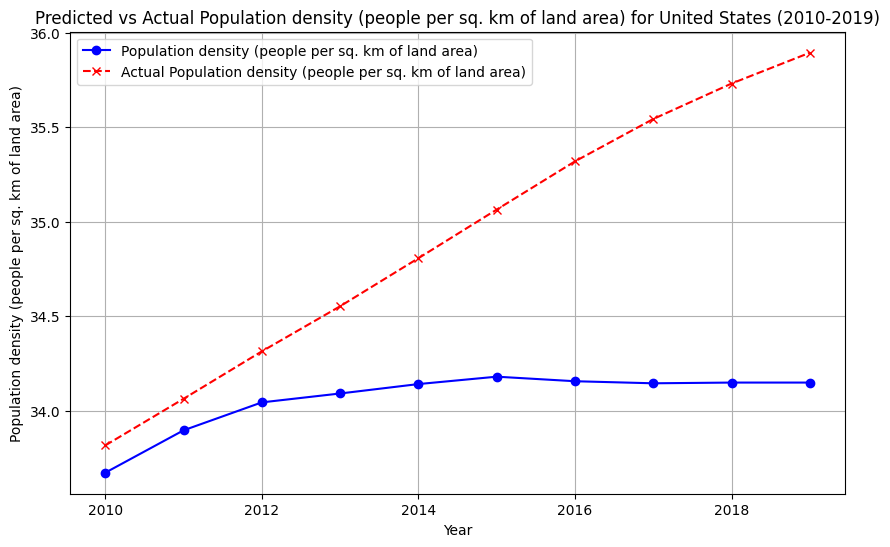

In [29]:
# Function to plot predictions vs actual values for a specified country
def plot_country_predictions_vs_actual(country_name):
    # Extracting predictions for the specified country
    if country_name not in country_recursive_predictions_rf:
        logger.error(f"No predictions found for {country_name}.")
        return

    predictions = country_recursive_predictions_rf[country_name]
    predicted_years = [year for year in predictions.keys() if year >= 2010]
    predicted_values = [predictions[year] for year in predicted_years]

    # Extracting actual values for the specified country and prediction years (2010 onward)
    actual_data = test_df[(test_df['Country Name'] == country_name) & (test_df['Year'].isin(predicted_years))]
    actual_years = actual_data['Year'].values
    actual_values = actual_data['Population density (people per sq. km of land area)'].values

    # Plotting predictions vs actual values from 2010 onward
    plt.figure(figsize=(10, 6))
    plt.plot(predicted_years, predicted_values, label='Population density (people per sq. km of land area)', color='blue', marker='o')
    plt.plot(actual_years, actual_values, label='Actual Population density (people per sq. km of land area)', color='red', linestyle='--', marker='x')
    plt.xlabel("Year")
    plt.ylabel("Population density (people per sq. km of land area)")
    plt.title(f"Predicted vs Actual Population density (people per sq. km of land area) for {country_name} (2010-2019)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Redefining test_df based on the years 2010-2019 from selected_df
test_df = selected_df_3[(selected_df_3['Year'] >= 2010) & (selected_df_3['Year'] <= 2019)].dropna(subset=['Population density (people per sq. km of land area)'])

# Rerun the plotting function for Kenya as an example
plot_country_predictions_vs_actual("United States")

In [30]:
# Define year variables for training and prediction
TRAIN_START_YEAR = 2000
TRAIN_END_YEAR = 2019
PREDICTION_START_YEAR = 2019
PREDICTION_END_YEAR = 2030

# Setting up logging configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

# Splitting data into training (2000-2019) set and setting up prediction years
train_df = selected_df_3[(selected_df_3['Year'] >= TRAIN_START_YEAR) & (selected_df_3['Year'] <= TRAIN_END_YEAR)].dropna(subset=['Population density (people per sq. km of land area)'])
prediction_years = range(PREDICTION_START_YEAR, PREDICTION_END_YEAR + 1)

# Preparing training data for the model
X_train = train_df[['Year', 'PD Moving_Avg_2Y', 'PD Moving_Avg_3Y', 'PD Moving_Avg_5Y', 'PD Moving_Avg_10Y']].values
y_train = train_df['Population density (people per sq. km of land area)'].values

# Initializing and training the Random Forest model on all training data
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
logger.info(f"Model trained on all countries' data ({TRAIN_START_YEAR}-{TRAIN_END_YEAR}). Starting recursive forecasting.")

# Dictionary to store predictions for each country
country_recursive_predictions_rf = {}

# Recursive forecasting for each country separately with detailed logging
for country in train_df['Country Name'].unique():
    logger.info(f"Processing country: {country}")

    # Get the last available data point for the country to start recursive prediction
    country_data = train_df[train_df['Country Name'] == country].iloc[-1].copy()
    predictions_per_country = {country_data['Year']: country_data['Population density (people per sq. km of land area)']}

    # Recursive prediction loop from PREDICTION_START_YEAR to PREDICTION_END_YEAR
    for year in prediction_years:
        country_data['Year'] = year
        
        # Logging the input data used for this prediction
        logger.info(f"Prediction inputs for {country} in {year}: Year={year}, "
                    f"PD Moving_Avg_2Y={country_data['PD Moving_Avg_2Y']}, "
                    f"PD Moving_Avg_3Y={country_data['PD Moving_Avg_3Y']}, "
                    f"PD Moving_Avg_5Y={country_data['PD Moving_Avg_5Y']}, "
                    f"PD Moving_Avg_10Y={country_data['PD Moving_Avg_10Y']}")
        
        # Preparing the features for the current prediction
        X_test = country_data[['Year', 'PD Moving_Avg_2Y', 'PD Moving_Avg_3Y', 'PD Moving_Avg_5Y', 'PD Moving_Avg_10Y']].values.reshape(1, -1)
        
        # Predicting life expectancy for the current year
        predicted_value = model_rf.predict(X_test)[0]
        logger.info(f"Predicted value for {country} in {year}: {predicted_value}")
        
        # Update the prediction in the dictionary
        predictions_per_country[year] = predicted_value
        
        # Update the features for the next prediction year based on the new prediction
        country_data['Population density (people per sq. km of land area)'] = predicted_value
        country_data['PD Moving_Avg_2Y'] = (predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 2
        country_data['PD Moving_Avg_3Y'] = (predictions_per_country.get(year - 2, predicted_value) +
                                         predictions_per_country.get(year - 1, predicted_value) + predicted_value) / 3
        country_data['PD Moving_Avg_5Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 4, year + 1)) / 5)
        country_data['PD Moving_Avg_10Y'] = (sum(predictions_per_country.get(y, predicted_value) for y in range(year - 9, year + 1)) / 10)

    # Store the predictions for the country
    country_recursive_predictions_rf[country] = predictions_per_country

2024-11-12 16:38:11,885 - INFO - Model trained on all countries' data (2000-2019). Starting recursive forecasting.
2024-11-12 16:38:11,886 - INFO - Processing country: Afghanistan
2024-11-12 16:38:11,886 - INFO - Prediction inputs for Afghanistan in 2019: Year=2019, PD Moving_Avg_2Y=57.07824157122485, PD Moving_Avg_3Y=56.26834143374779, PD Moving_Avg_5Y=54.732044524170895, PD Moving_Avg_10Y=50.69563405547121
2024-11-12 16:38:11,889 - INFO - Predicted value for Afghanistan in 2019: 57.91583281920898
2024-11-12 16:38:11,889 - INFO - Prediction inputs for Afghanistan in 2020: Year=2020, PD Moving_Avg_2Y=57.91583281920898, PD Moving_Avg_3Y=57.91583281920898, PD Moving_Avg_5Y=57.91583281920898, PD Moving_Avg_10Y=57.91583281920897
2024-11-12 16:38:11,891 - INFO - Predicted value for Afghanistan in 2020: 58.45691881983078
2024-11-12 16:38:11,892 - INFO - Prediction inputs for Afghanistan in 2021: Year=2021, PD Moving_Avg_2Y=58.18637581951988, PD Moving_Avg_3Y=58.276556819623515, PD Moving_Avg

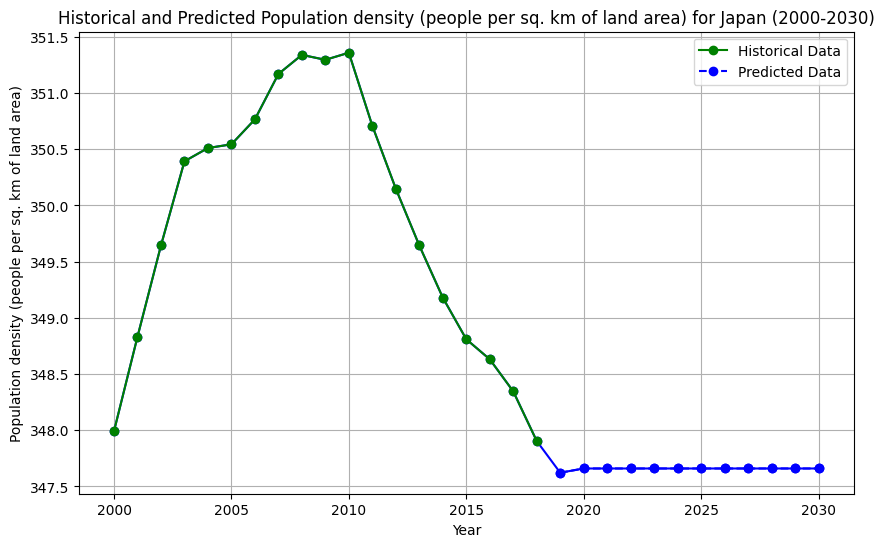

In [31]:
# Function to plot historical and predicted life expectancy for a specified country
def plot_country_predictions_vs_actual(country_name):
    # Extracting predictions for the specified country
    if country_name not in country_recursive_predictions_rf:
        logger.error(f"No predictions found for {country_name}.")
        return

    predictions = country_recursive_predictions_rf[country_name]
    predicted_years = list(predictions.keys())
    predicted_values = list(predictions.values())

    # Extracting historical values for the specified country (2000-2019)
    historical_data = selected_df_3[(selected_df_3['Country Name'] == country_name) & 
                                  (selected_df_3['Year'] >= TRAIN_START_YEAR) & 
                                  (selected_df_3['Year'] <= TRAIN_END_YEAR-1)]
    historical_years = historical_data['Year'].values
    historical_values = historical_data['Population density (people per sq. km of land area)'].values

    # Combining historical and predicted data to ensure a continuous line
    combined_years = list(historical_years) + predicted_years
    combined_values = list(historical_values) + predicted_values

    # Plotting historical and predicted values as a single line
    plt.figure(figsize=(10, 6))
    plt.plot(combined_years, combined_values, color='blue', marker='o', linestyle='-')
    plt.plot(historical_years, historical_values, label='Historical Data', color='green', marker='o')
    plt.plot(predicted_years, predicted_values, label='Predicted Data', color='blue', marker='o', linestyle='--')
    plt.xlabel("Year")
    plt.ylabel("Population density (people per sq. km of land area)")
    plt.title(f"Historical and Predicted Population density (people per sq. km of land area) for {country_name} (2000-2030)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Rerun the plotting function for Canada as an example
plot_country_predictions_vs_actual("Japan")

In [32]:
# Displaying feature importances from the Random Forest model directly

# Calculating feature importances
feature_importances = model_rf.feature_importances_
feature_names = ['Year', 'SPEI Moving_Avg_2Y', 'SPEI Moving_Avg_3Y', 'SPEI Moving_Avg_5Y', 'SPEI Moving_Avg_10Y']

# Creating a DataFrame to organize and sort feature importances
import pandas as pd
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
importance_df.reset_index(drop=True, inplace=True)
importance_df

Feature  Importance
0   SPEI Moving_Avg_5Y    0.371401
1   SPEI Moving_Avg_3Y    0.231785
2  SPEI Moving_Avg_10Y    0.207028
3   SPEI Moving_Avg_2Y    0.189004
4                 Year    0.000782

In [80]:
# Converting the dictionary of predictions for each country (country_recursive_predictions_rf) into a DataFrame

# Initialize an empty list to store rows for the DataFrame
rows = []

# Loop through each country and its predictions to build the DataFrame rows
for country, predictions in country_recursive_predictions_rf.items():
    for year, precip in predictions.items():
        # Append each prediction as a new row with the country, year, and predicted value
        rows.append({'Country Name': country, 'Year': year, 'Population density (people per sq. km of land area)': precip})

# Convert the list of rows into a DataFrame
predictions_df_3 = pd.DataFrame(rows)

predictions_df_3


Country Name  Year  Population density (people per sq. km of land area)
0     Afghanistan  2019                                          57.915833  
1     Afghanistan  2020                                          58.456919  
2     Afghanistan  2021                                          58.964175  
3     Afghanistan  2022                                          59.329357  
4     Afghanistan  2023                                          59.762140  
...           ...   ...                                                ...  
2311     Zimbabwe  2026                                          40.774554  
2312     Zimbabwe  2027                                          40.798040  
2313     Zimbabwe  2028                                          41.135138  
2314     Zimbabwe  2029                                          41.265114  
2315     Zimbabwe  2030                                          41.364317  

[2316 rows x 3 columns]

In [79]:
selected_df_clean = selected_df.drop(['Country Code'],axis=1)
selected_df_2_clean = selected_df_2.drop(['Country Code'],axis=1)
selected_df_3_clean = selected_df_3.drop(['Country Code'],axis=1)

In [147]:
combined_hist_df_1_2=pd.merge(selected_df_clean, selected_df_2_clean, on=['Country Name', 'Year','Agricultural land (% of land area)'], how='outer')
combined_hist_df_1_2_3 = pd.merge(combined_hist_df_1_2, selected_df_3_clean, on=['Country Name', 'Year','Population density (people per sq. km of land area)'], how='outer')

columns_to_drop = combined_hist_df_1_2_3.columns[combined_hist_df_1_2_3.columns.str.contains('Moving_Avg')]
combined_hist_df_1_2_3_clean = combined_hist_df_1_2_3.drop(columns=columns_to_drop)

combined_hist_filtered = combined_hist_df_1_2_3_clean[combined_hist_df_1_2_3_clean['Year'] < 2022]

combined_pred_1_2=pd.merge(predictions_df_1, predictions_df_2, on=['Country Name', 'Year'], how='outer')
combined_pred=pd.merge(combined_pred_1_2, predictions_df_3, on=['Country Name', 'Year'], how='outer')

combined_pred_filtered = combined_pred[combined_pred['Year'] > 2019]

combined_pred_filtered.columns = combined_hist_filtered.columns

combined_df = pd.merge(combined_hist_filtered, combined_pred_filtered,on = ['Country Name','Year','Life expectancy at birth, total (years)','Agricultural land (% of land area)','Population density (people per sq. km of land area)'], how='outer')


In [148]:
#Export results to a df to be read for finalized plotting

combined_df.to_excel('Historical and Predicted Indicator Data.xlsx', sheet_name='Results', index=False)